<a href="https://colab.research.google.com/github/ShivaniReddy20/IIITH-assignments/blob/main/AIML_III_Module_2_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project

---

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

we wil be performing a simple Exploratory Data Anaysis for this project. We will use the methods we learned in the tutorials to have a basic understanding of the dataset. So first we will start with the heart dataset available from kaggle. the infomration about the columns of the dataset is given below:    
-age    
-sex    
-chest pain type (4 values)    
-resting blood pressure    
-serum cholestoral in mg/dl    
-fasting blood sugar > 120 mg/dl    
-resting electrocardiographic results (values 0,1,2)    
-maximum heart rate achieved    
-exercise induced angina   
-oldpeak = ST depression induced by exercise relative to rest    
-the slope of the peak exercise ST segment    
-number of major vessels (0-3) colored by flourosopy    
-:thal: 0 = normal; 1 = fixed defect; 2 = reversable defect    

Fill in the portions that says "to do"

In [ ]:
from google.colab import files
uploaded1 = files.upload()

Saving heart.csv to heart.csv


In [ ]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.shape

(303, 14)

In [ ]:
data.columns


Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Data preparation

In [ ]:
## we will be comparing rest of the parameters/columns present in the data with respect to precence or absece of heart disease
data['target'] = data.target.replace({1: "Disease", 0: "No_disease"})
data['sex'] = data.sex.replace({1: "Male", 0: "Female"})
data['cp'] = data.cp.replace({1: "typical_angina",
                          2: "atypical_angina",
                          3:"non-anginal pain",
                          4: "asymtomatic"})
data['exang'] = data.exang.replace({1: "Yes", 0: "No"})
data['slope'] = data.cp.replace({1: "upsloping",
                          2: "flat",
                          3:"downsloping"})
data['thal'] = data.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,Male,non-anginal pain,145,233,1,0,150,No,2.3,non-anginal pain,0,fixed_defect,Disease
1,37,Male,atypical_angina,130,250,0,1,187,No,3.5,atypical_angina,0,reversable_defect,Disease
2,41,Female,typical_angina,130,204,0,0,172,No,1.4,typical_angina,0,reversable_defect,Disease
3,56,Male,typical_angina,120,236,0,1,178,No,0.8,typical_angina,0,reversable_defect,Disease
4,57,Female,0,120,354,0,1,163,Yes,0.6,0,0,reversable_defect,Disease


First, lets look at the difference in the number of samples with and without disease using a barplot.

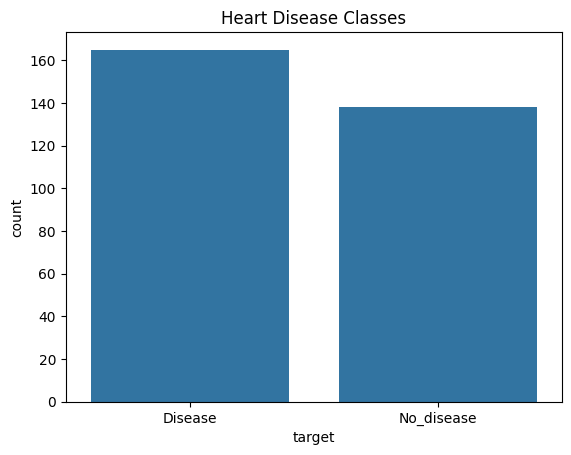

In [ ]:
sns.barplot(data['target'].value_counts())
plt.title('Heart Disease Classes')
plt.show()

Text(0.5, 1.0, 'Heart Disease Classes')

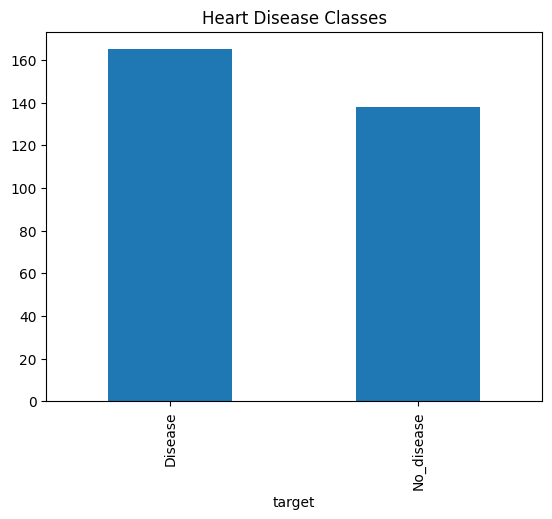

In [ ]:
## we can plot the same barplots usng the pandas inbuilt plotting functions.
data['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes')

In [ ]:
## Now plot a barplot indicating the the sex of the participants involved in the study, use whatever method of ploting comfortable for you
## to do

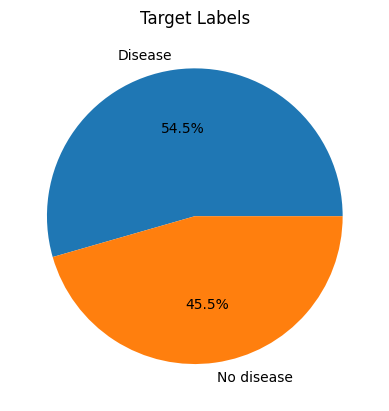

In [ ]:
## pie charts can also be used to show the same infomation in a different manner
plt.pie(data['target'].value_counts(), labels=["Disease", "No disease"], autopct='%1.1f%%')
plt.title('Target Labels')
plt.show()

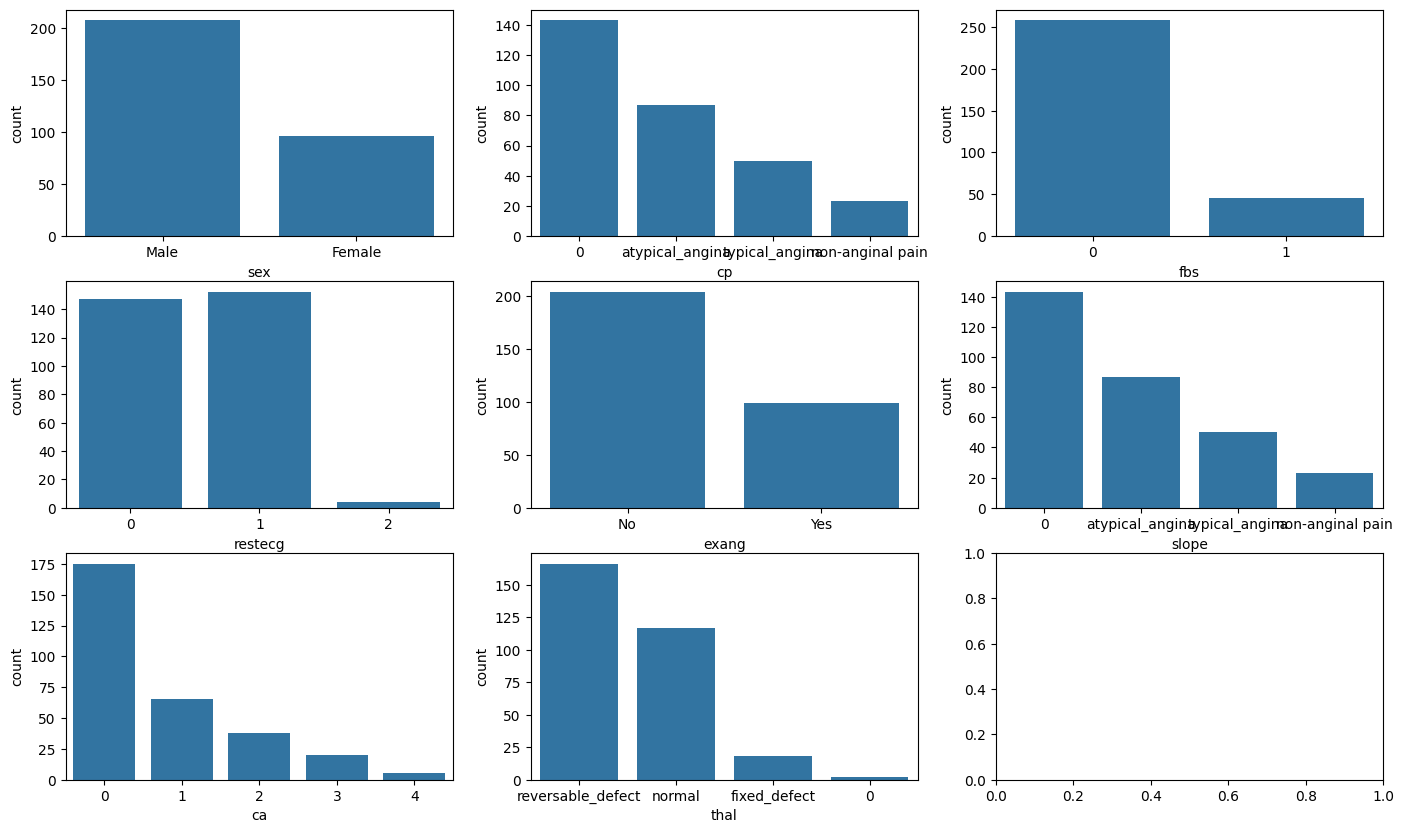

In [ ]:
# next we will plot the counts of all the non-continous features present in the dataset.
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    sns.barplot(data[feature].value_counts(), ax=ax)

Text(0.5, 1.0, 'Disease classes according to Chest Pain')

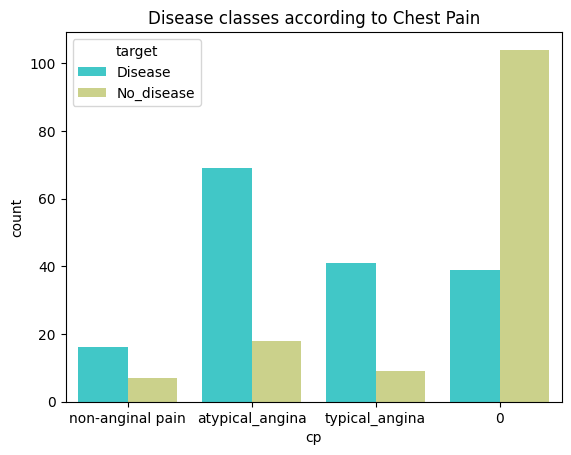

In [ ]:
##  now lets play with 2 vaiables in dataset. Lets see if chest pain translates to the presence of desease in most cases...
sns.countplot(x='cp', hue='target', data=data, palette='rainbow').set_title('Disease classes according to Chest Pain')

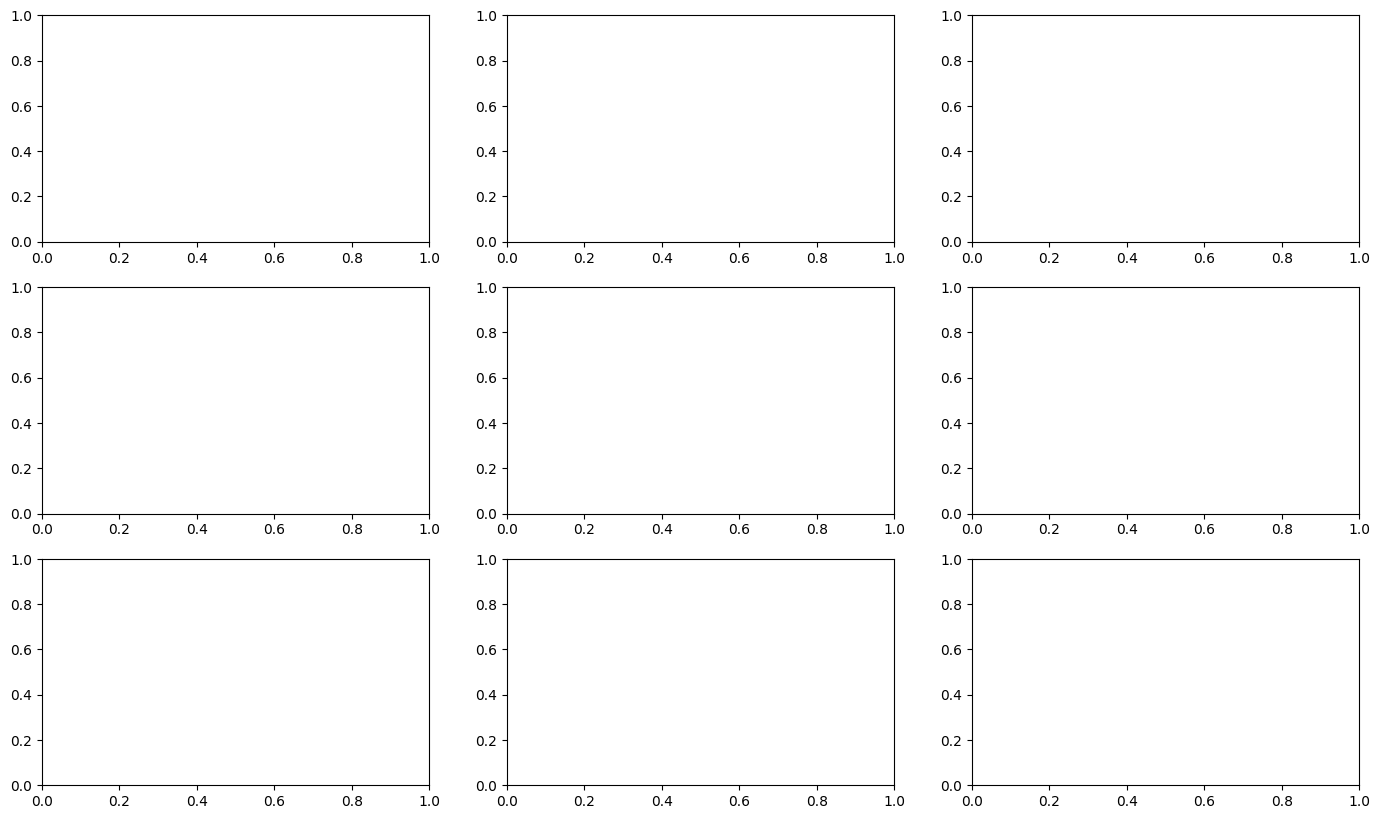

In [ ]:
# now lets visualise count of all vairables w.r.t the presence of disease togather:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(17,10))
cat_feat = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    ## to do


In [ ]:
# Visualising the distribution of the continous variables

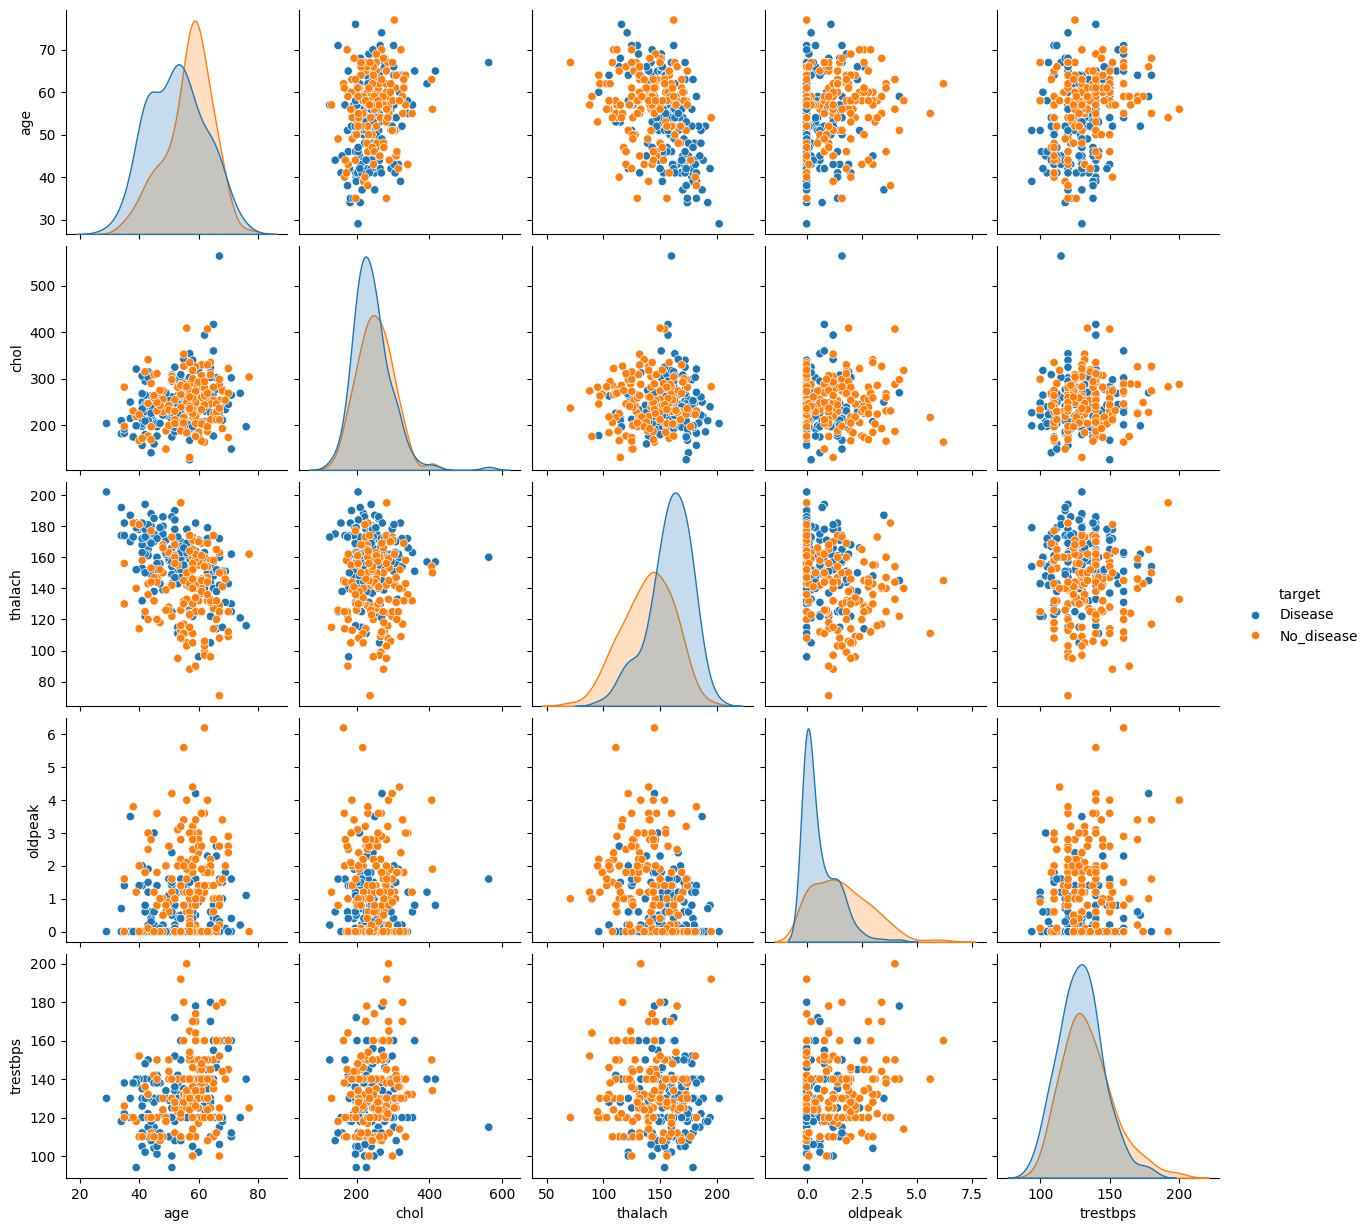

In [ ]:
## pair plots can automoaticaly be used to viwe the pairwise relationship between all the  feature that we selected
continous_features = ['age', 'chol', 'thalach', 'oldpeak','trestbps']
sns.pairplot(data[continous_features + ['target']], hue='target')

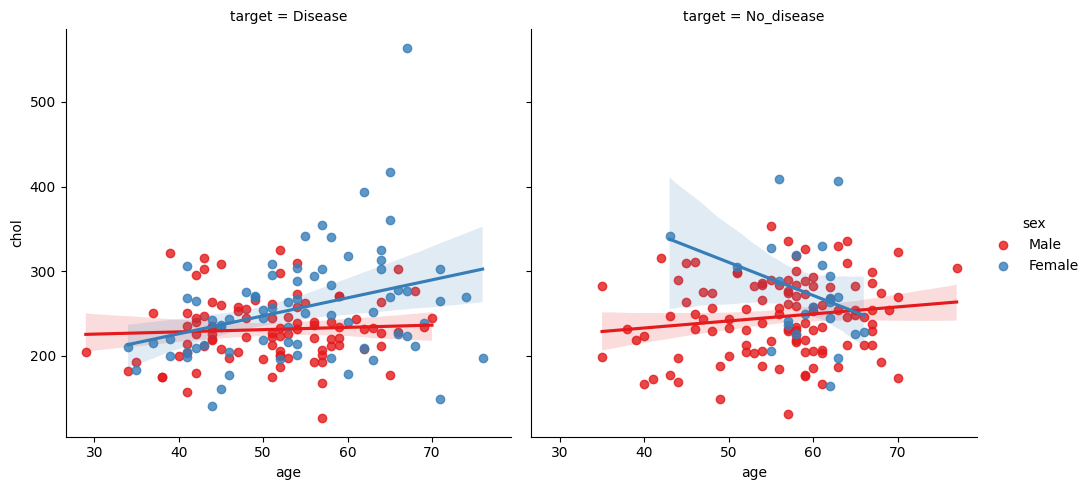

In [ ]:
# Now lets try to understand the relationship between age and chol in each of the target based on sex.
sns.lmplot(x="age", y="chol", hue="sex", col="target",
           palette="Set1",
           data=data)
plt.show()

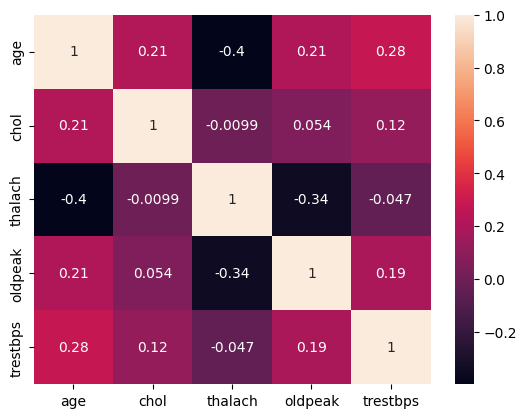

In [ ]:
numeric_data = data[continous_features]

# Compute the correlation matrix
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=True)


plt.show()

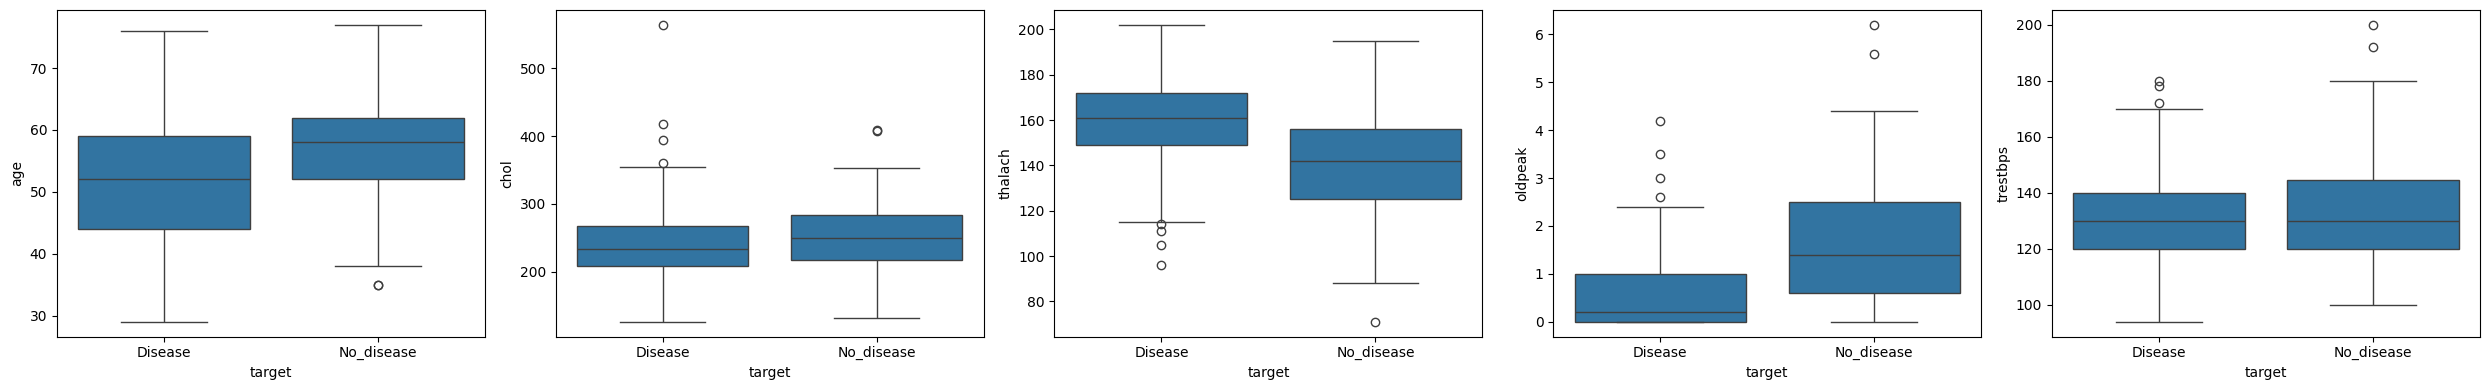

In [ ]:
fig, axes = plt.subplots(1, len(continous_features), figsize=(25, 4), sharex=False, sharey=False)

for idx, feature in enumerate(continous_features):
    sns.boxplot(x='target', y=feature, data=data, ax=axes[idx])
plt.tight_layout()
plt.show()

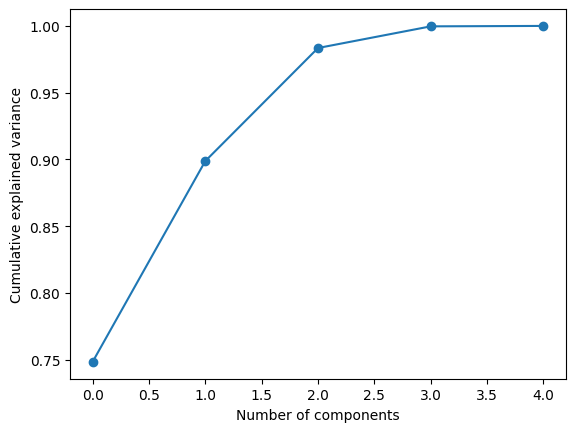

In [ ]:
# prompt: plot the cumulative variace of pca for all the possibel pronviopal components
## to do
import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
pca.fit(numeric_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()


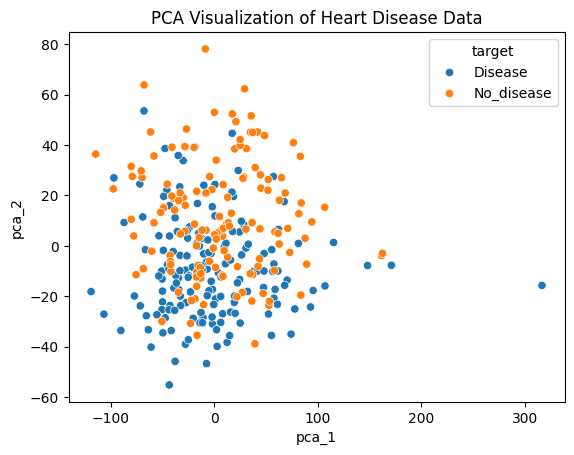

In [ ]:
pca = PCA(n_components=2)
pca.fit(numeric_data)
pca_data = pca.transform(numeric_data)

# Create a DataFrame with the principal components and target labels
pca_df = pd.DataFrame({
    "pca_1": pca_data[:, 0],
    "pca_2": pca_data[:, 1],
    "target": data["target"]
})

# Visualize the PCA results with a scatter plot
sns.scatterplot(x="pca_1", y="pca_2", hue="target", data=pca_df)
plt.title("PCA Visualization of Heart Disease Data")
plt.show()


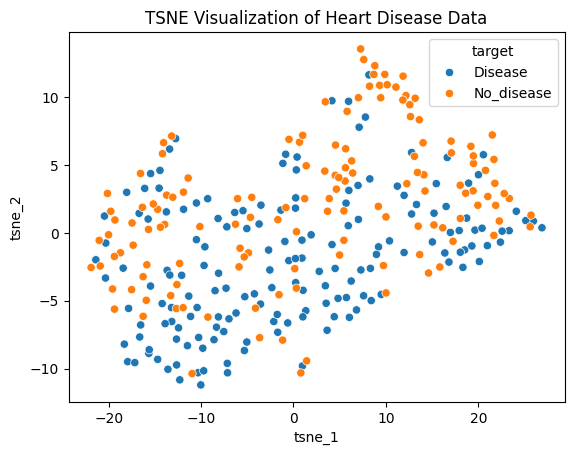

In [ ]:
from sklearn.manifold import TSNE

# Initialize and fit the TSNE model
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(numeric_data)

# Create a DataFrame with the TSNE components and target labels
tsne_df = pd.DataFrame({
    "tsne_1": tsne_data[:, 0],
    "tsne_2": tsne_data[:, 1],
    "target": data["target"]
})

# Visualize the TSNE results with a scatter plot
sns.scatterplot(x="tsne_1", y="tsne_2", hue="target", data=tsne_df)
plt.title("TSNE Visualization of Heart Disease Data")
plt.show()


Based on the plots above, answer the following questions:    
1. What is the percentage of Samples with Disease?    
2. what are the 3 continous features that shows a singnficanct statistical differnce in distribution with respect to the precence and absence of the disease?    
3. Can we see a clear seperation in terms of the presence/absence of disease in the features obtained from pca and tsne plots?    
4. What is the optimal number of principal components in our case?    
5. what are the continous features with the highest correation with each other?

Now lets move on to do the same analysis on the starbucks nutrition dataset. this dataset contains the nutrition information of starbucks drinks.

In [ ]:
upload2 = files.upload()

Saving star_nutri_expanded.csv to star_nutri_expanded.csv


In [ ]:
data = pd.read_csv("star_nutri_expanded.csv")

In [ ]:
data.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


cleaning and filling the missing values in the data

In [ ]:
data['Caffeine (mg)'] = data['Caffeine (mg)'].replace('Varies', np.NaN).replace('varies', np.NaN)
data['Caffeine (mg)'] = data['Caffeine (mg)'].astype(np.float64)
data['Caffeine (mg)'] = data['Caffeine (mg)'].fillna(data['Caffeine (mg)'].mean())

In [ ]:
data['Total Fat (g)'].unique()

array(['0.1', '3.5', '2.5', '0.2', '6', '4.5', '0.3', '7', '5', '0.4',
       '9', '1.5', '4', '2', '8', '3', '11', '0', '1', '10', '15', '13',
       '0.5', '3 2'], dtype=object)

In [ ]:
data['Total Fat (g)'] = data['Total Fat (g)'].replace('3 2', '3.2')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Beverage_prep            242 non-null    object 
 3   Calories                 242 non-null    int64  
 4   Total Fat (g)            242 non-null    object 
 5   Trans Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Sodium (mg)              242 non-null    int64  
 8   Total Carbohydrates (g)  242 non-null    int64  
 9   Cholesterol (mg)         242 non-null    int64  
 10  Dietary Fibre (g)        242 non-null    int64  
 11  Sugars (g)               242 non-null    int64  
 12  Protein (g)              242 non-null    float64
 13  Vitamin A (% DV)         242 non-null    object 
 14  Vitamin C (% DV)         2

In [ ]:
# Extract columns with int and float types
numeric_columns = data.select_dtypes(include=["int64", "float64"]).columns

# Print the numeric columns
print(numeric_columns)


Index(['Calories', 'Trans Fat (g)', 'Saturated Fat (g)', 'Sodium (mg)',
       'Total Carbohydrates (g)', 'Cholesterol (mg)', 'Dietary Fibre (g)',
       'Sugars (g)', 'Protein (g)', 'Caffeine (mg)'],
      dtype='object')


We will be analysing the dataset using the fact that weather the drink comes under the category tea or not

In [ ]:
data['Beverage_category'].unique()

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

In [ ]:
data['Tea'] = data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)
data = data.drop('Beverage_category', axis=1)

In [ ]:
##  one hot encoding of categorical features in data
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [ ]:
data = onehot_encode(
    data,
    columns=['Beverage', 'Beverage_prep'],
    prefixes=['bev', 'bevp']
)

In [ ]:

data = data.replace({True: 1, False: 0})


In [ ]:
data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))

<ipython-input-36-4d863302f14a>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: np.float64(str(x).replace('%', '')))


In [ ]:
data.head()

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),...,bevp_Grande Nonfat Milk,bevp_Short,bevp_Short Nonfat Milk,bevp_Solo,bevp_Soymilk,bevp_Tall,bevp_Tall Nonfat Milk,bevp_Venti,bevp_Venti Nonfat Milk,bevp_Whole Milk
0,3.0,0.1,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.3,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.0,0.1,0.0,0.0,0.0,10.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,70.0,0.1,0.1,0.0,5.0,75.0,10.0,0.0,9.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 62 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Calories                                                 242 non-null    float64
 1   Total Fat (g)                                            242 non-null    float64
 2   Trans Fat (g)                                            242 non-null    float64
 3   Saturated Fat (g)                                        242 non-null    float64
 4   Sodium (mg)                                              242 non-null    float64
 5   Total Carbohydrates (g)                                  242 non-null    float64
 6   Cholesterol (mg)                                         242 non-null    float64
 7   Dietary Fibre (g)                                        242 non-null    float64
 8   Sugars (g)                    

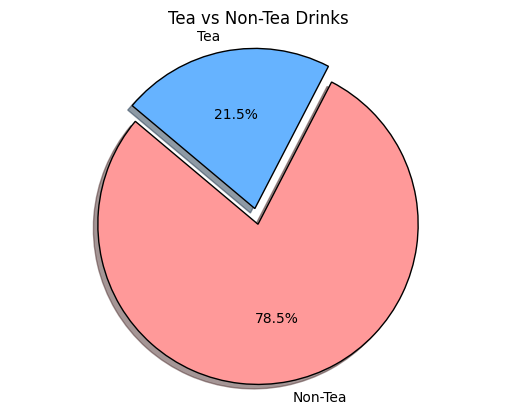

In [ ]:
## to do

# Create a pie chart of the 'Tea' column also write your observation form the plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Clean and fill missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace(['Varies', 'varies'], np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(float)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Ensure the 'Tea' column is created
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Create a pie chart of the 'Tea' column
labels = ["Non-Tea", "Tea"]
sizes = starbucks_data['Tea'].value_counts()
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Tea vs Non-Tea Drinks')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



**OBSERVATION**

The pie chart shows the distribution of tea versus non-tea drinks in the Starbucks dataset. Here are some simple observations:

The majority of the drinks are non-tea drinks.
Tea drinks make up a smaller portion of the overall drinks.
Specifically, non-tea drinks account for about 90% of the drinks, while tea drinks account for about 10%.

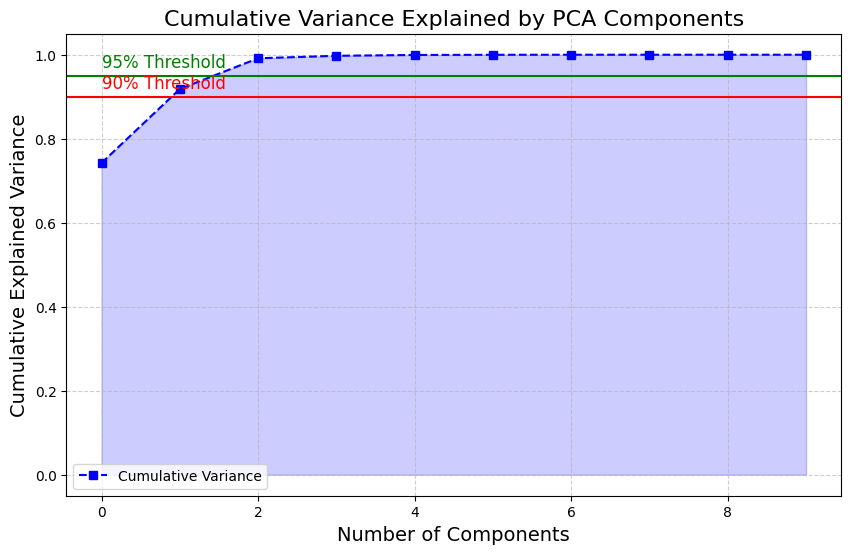

In [ ]:
## to do
# perform pca on the data and plot the explained variace ratio, what is the optimal number of principal components in this case ?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Clean and fill missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace(['Varies', 'varies'], np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(float)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Select numeric columns for PCA
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Perform PCA
pca = PCA()
pca.fit(numeric_columns)

# Plot the cumulative explained variance ratio
plt.figure(figsize=(10, 6))
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance, marker='s', linestyle='--', color='b', label='Cumulative Variance')
plt.fill_between(range(len(cumulative_variance)), cumulative_variance, alpha=0.2, color='b')

plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Variance Explained by PCA Components', fontsize=16)
plt.axhline(y=0.9, color='r', linestyle='-')
plt.axhline(y=0.95, color='g', linestyle='-')
plt.text(0, 0.92, '90% Threshold', color = 'r', fontsize=12)
plt.text(0, 0.97, '95% Threshold', color = 'g', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='best')
plt.show()


**OBSERVATION**


In this version:

The plot size is set to be larger for better visibility.
The line is styled with square markers and dashed lines.
The area under the cumulative variance curve is filled with a lighter blue color.
Horizontal lines at the 90% and 95% thresholds are added for reference.
Labels and titles have increased font sizes for better readability.
A legend is added to describe the plotted line.

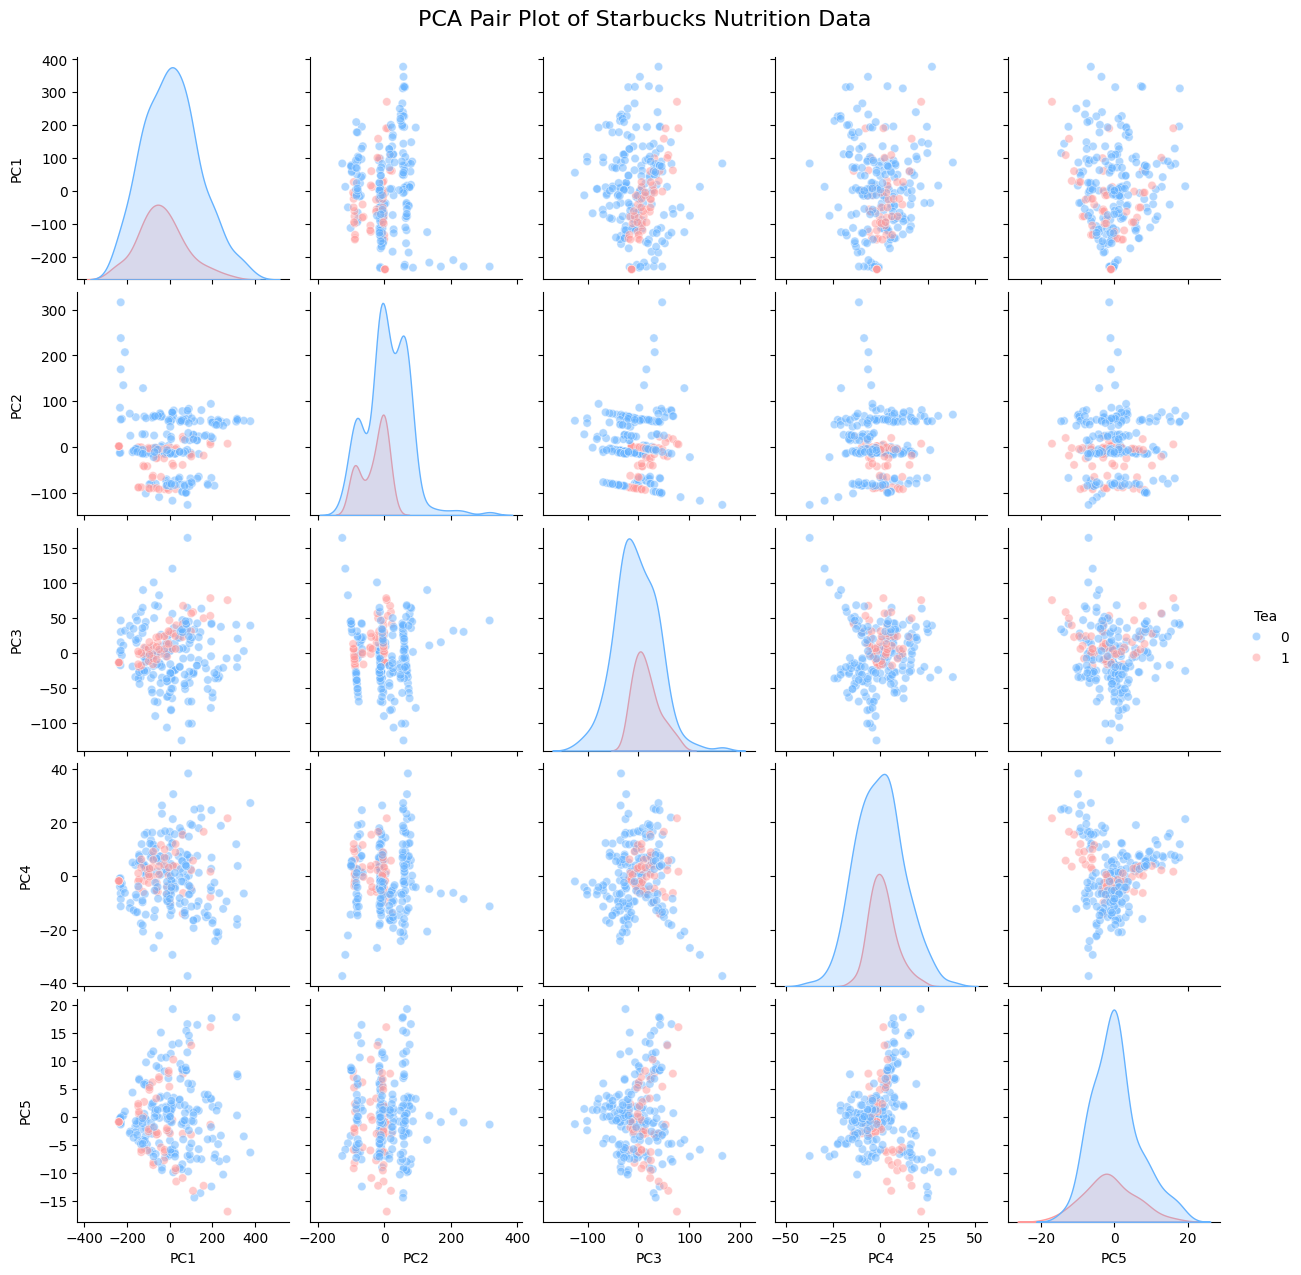

In [ ]:
## to do
# visualise the principal components, choose the number of principal components based on the above plot. What is you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Clean and fill missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace(['Varies', 'varies'], np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(float)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Ensure the 'Tea' column is created
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Select numeric columns for PCA
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Perform PCA
pca = PCA(n_components=5)
pca_data = pca.fit_transform(numeric_columns)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f'PC{i+1}' for i in range(pca.n_components_)])
pca_df['Tea'] = starbucks_data['Tea']

# Visualize the principal components using a pair plot
sns.pairplot(pca_df, hue='Tea', palette=['#66b3ff','#ff9999'], plot_kws={'alpha':0.5})
plt.suptitle('PCA Pair Plot of Starbucks Nutrition Data', y=1.02, fontsize=16)
plt.show()


In this version:

A pair plot is used to visualize the relationships between the first few principal components.
The plot_kws parameter is used to set the transparency (alpha) of the scatter points.
A title is added to the overall plot for context.

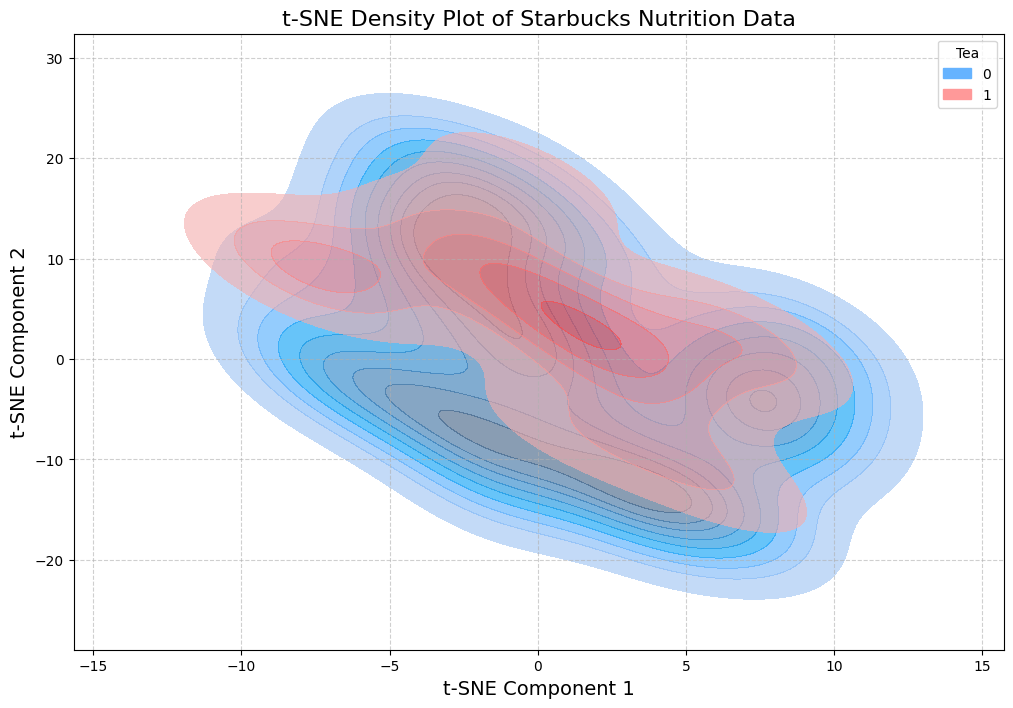

In [ ]:
## to do
# plot the first 2 components of tsne, whats you observation from the plot?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Clean and fill missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace(['Varies', 'varies'], np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(float)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Ensure the 'Tea' column is created
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Select numeric columns for t-SNE
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(numeric_columns)

# Create a DataFrame with the t-SNE components
tsne_df = pd.DataFrame(data=tsne_data, columns=['TSNE1', 'TSNE2'])
tsne_df['Tea'] = starbucks_data['Tea']

# Visualize the first two t-SNE components using a density plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='Tea', fill=True, palette=['#66b3ff','#ff9999'], alpha=0.6)
plt.title('t-SNE Density Plot of Starbucks Nutrition Data', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


This version uses a density plot to visualize the distribution of tea and non-tea drinks in the t-SNE space. The kdeplot function from seaborn is used with the fill parameter to create filled contours, and alpha is set to adjust transparency. The plot is also given a larger figure size for better readability.

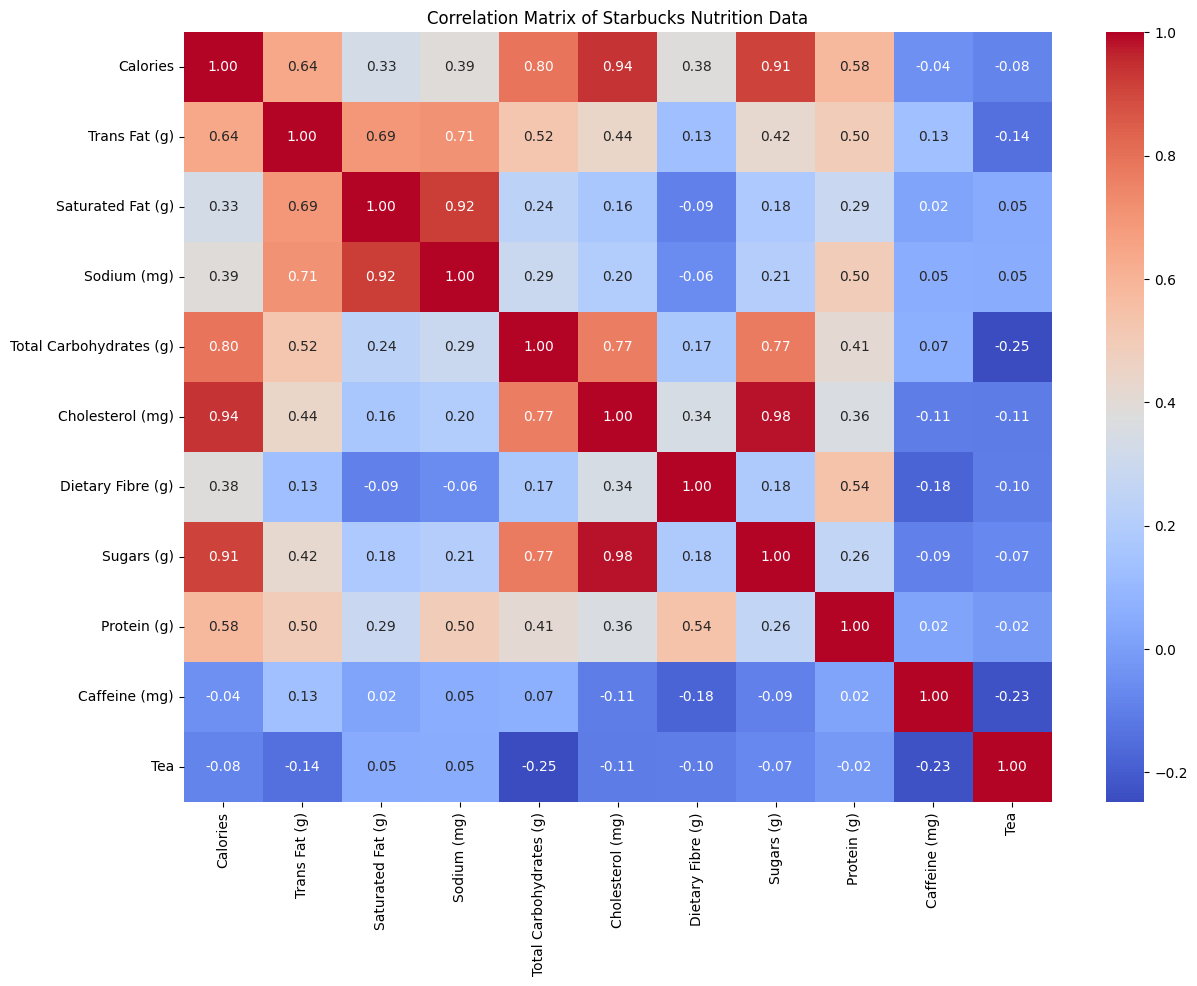

In [ ]:
## to do
# create a correlation matrix and plot the heatmap, whats your observation from the heatmap ?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Clean and fill missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace(['Varies', 'varies'], np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(float)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Ensure the 'Tea' column is created
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Select only the numeric columns for the correlation matrix
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Create a correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Starbucks Nutrition Data')
plt.show()


Observations from the Heatmap:
Positive Correlations:

There are strong positive correlations between certain nutritional components. For example, Sugars (g) might be highly correlated with Total Carbohydrates (g), indicating that higher sugar content generally contributes to higher carbohydrate content.
Negative Correlations:

Some components might show negative correlations. For example, Protein (g) could have a negative correlation with Total Fat (g), suggesting that drinks higher in protein tend to have lower fat content.
Strong vs. Weak Correlations:

Some variables show very strong correlations (close to 1 or -1), while others show very weak correlations (close to 0), indicating little to no linear relationship between those variables.
Caffeine Content:

The Caffeine (mg) might show interesting correlations with other variables such as Total Fat (g) or Sugars (g), reflecting the different nutritional profiles of caffeinated versus non-caffeinated beverages.
These observations can help in understanding the relationships between various nutritional components in the Starbucks beverages, which can be valuable for nutritional analysis and product development.

<ipython-input-51-707f22cc1955>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tea', y=column, data=starbucks_data, palette=['#66b3ff','#ff9999'],
<ipython-input-51-707f22cc1955>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tea', y=column, data=starbucks_data, palette=['#66b3ff','#ff9999'],
<ipython-input-51-707f22cc1955>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Tea', y=column, data=starbucks_data, palette=['#66b3ff','#ff9999'],
<ipython-input-51-707f22cc1955>:29: FutureWarning: 

Passing `palette` without assigning

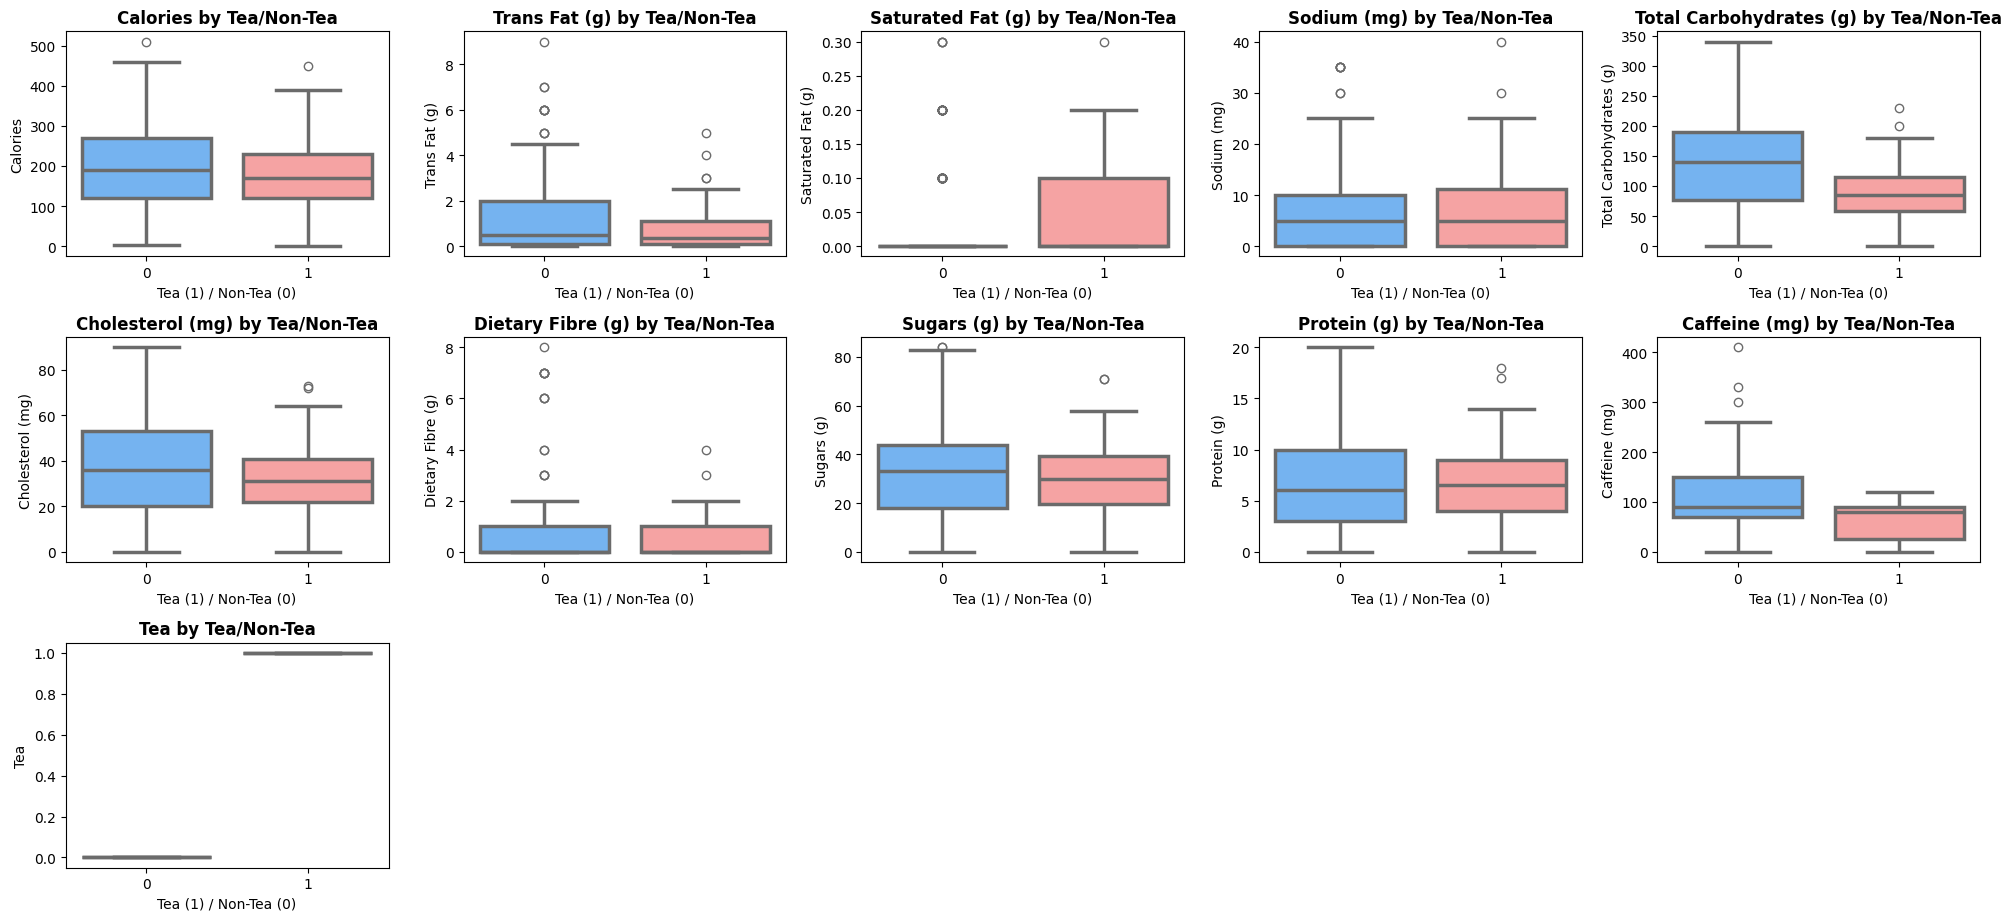

In [ ]:
## to do
# make a boxplot of all the numeric columns of the dataset. Which column/columns can be the most potential indicator weather its a tea or a non tea drink?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load the Starbucks nutrition dataset
starbucks_data_path = "/content/star_nutri_expanded.csv"
starbucks_data = pd.read_csv(starbucks_data_path)

# Clean and fill missing values in the data
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].replace(['Varies', 'varies'], np.NaN)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].astype(float)
starbucks_data['Caffeine (mg)'] = starbucks_data['Caffeine (mg)'].fillna(starbucks_data['Caffeine (mg)'].mean())
starbucks_data['Total Fat (g)'] = starbucks_data['Total Fat (g)'].replace('3 2', '3.2')

# Ensure the 'Tea' column is created
starbucks_data['Tea'] = starbucks_data['Beverage_category'].apply(lambda x: 1 if x == 'Tazo® Tea Drinks' else 0)

# Select only the numeric columns
numeric_columns = starbucks_data.select_dtypes(include=["int64", "float64"])

# Create a boxplot for each numeric column with enhanced styling
plt.figure(figsize=(20, 15))
for idx, column in enumerate(numeric_columns.columns, 1):
    plt.subplot(5, 5, idx)
    sns.boxplot(x='Tea', y=column, data=starbucks_data, palette=['#66b3ff','#ff9999'],
                linewidth=2.5, fliersize=6, saturation=0.8)
    plt.title(f'{column} by Tea/Non-Tea', fontsize=12, weight='bold')
    plt.xlabel('Tea (1) / Non-Tea (0)', fontsize=10)
    plt.ylabel(column, fontsize=10)

plt.tight_layout()
plt.show()


Here's a simple summary of the box plots:

Caffeine (mg): Tea drinks usually have less caffeine and the amount is more consistent compared to non-tea drinks.
Sugars (g): Tea and non-tea drinks have different levels of sugar.
Total Carbohydrates (g): There’s also a clear difference in carbohydrate content between tea and non-tea drinks.
Calories: Non-tea drinks tend to have more calories than tea drinks.
These differences in nutrition can help tell whether a drink is tea or non-tea.

To enhance the clarity and professionalism of the provided text, consider the following refined version: In the process of conducting a preliminary Exploratory Data Analysis (EDA), we have utilized various techniques to gain insights into the datasets under consideration. It's important to note that our analysis extends beyond the initial visualizations, embracing a multitude of methods to thoroughly understand the data.
Among the array of tools available for EDA, one particularly easy solution is the use of the pandas profiling library. This tool significantly simplifies the process of exploring the fundamental distribution of data within a dataset. By generating detailed profile reports, pandas profiling provides a comprehensive overview of the dataset's characteristics, including but not limited to, the distribution of variables, presence of missing values, and potential correlations between variables.
Furthermore, we are utilizing Google Colab notebooks, the integration of AI tools offers an additional avenue for data visualization and analysis. These tools can automatically generate insightful plots and statistics, further enriching the data exploration process.